In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 46kB/s 


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 99% 279M/282M [00:07<00:00, 49.9MB/s]
100% 282M/282M [00:07<00:00, 40.5MB/s]


In [7]:
!unzip fashion-product-images-small.zip

Archive:  fashion-product-images-small.zip
   creating: images/
  inflating: images/9733.jpg         
  inflating: images/14147.jpg        
  inflating: images/52112.jpg        
  inflating: images/6400.jpg         
  inflating: images/34297.jpg        
  inflating: images/24084.jpg        
  inflating: images/12536.jpg        
  inflating: images/54563.jpg        
  inflating: images/15259.jpg        
  inflating: images/35189.jpg        
  inflating: images/44770.jpg        
  inflating: images/4217.jpg         
  inflating: images/47279.jpg        
  inflating: images/36480.jpg        
  inflating: images/16750.jpg        
  inflating: images/50705.jpg        
  inflating: images/26693.jpg        
  inflating: images/37946.jpg        
  inflating: images/3578.jpg         
  inflating: images/40516.jpg        
  inflating: images/10321.jpg        
  inflating: images/16988.jpg        
  inflating: images/59047.jpg        
  inflating: images/2666.jpg         
  inflating: images/4160

In [8]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [0]:
files = []
for i, x in enumerate(os.listdir('/content/images/')):
  if 'jpg' in x:
    files.append('/content/images/' + x)
  if i >= 3000:
    break

In [0]:
imgs_path = "../content/images/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [11]:
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

W0729 05:39:27.311461 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 05:39:27.337000 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 05:39:27.341917 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 05:39:27.381355 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 41s 0us/step


W0729 05:40:10.623773 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0729 05:40:10.625311 140343424612224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [13]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(3001, 4096)

In [14]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/images/13669.jpg,/content/images/7381.jpg,/content/images/6789.jpg,/content/images/54538.jpg,/content/images/19410.jpg,/content/images/40309.jpg,/content/images/59568.jpg,/content/images/28124.jpg,/content/images/28396.jpg,/content/images/28435.jpg,/content/images/19370.jpg,/content/images/34494.jpg,/content/images/18828.jpg,/content/images/47221.jpg,/content/images/48452.jpg,/content/images/9975.jpg,/content/images/28169.jpg,/content/images/2252.jpg,/content/images/11278.jpg,/content/images/33850.jpg,/content/images/46545.jpg,/content/images/12405.jpg,/content/images/56273.jpg,/content/images/47271.jpg,/content/images/39981.jpg,/content/images/24929.jpg,/content/images/59355.jpg,/content/images/50633.jpg,/content/images/18463.jpg,/content/images/34453.jpg,/content/images/39624.jpg,/content/images/59961.jpg,/content/images/54073.jpg,/content/images/19420.jpg,/content/images/46906.jpg,/content/images/17501.jpg,/content/images/18470.jpg,/content/images/8580.jpg,/content/images/40083.jpg,/content/images/33858.jpg,...,/content/images/45601.jpg,/content/images/55146.jpg,/content/images/7921.jpg,/content/images/15687.jpg,/content/images/43391.jpg,/content/images/27081.jpg,/content/images/48686.jpg,/content/images/5420.jpg,/content/images/4985.jpg,/content/images/59797.jpg,/content/images/48223.jpg,/content/images/40177.jpg,/content/images/16153.jpg,/content/images/55148.jpg,/content/images/59862.jpg,/content/images/38481.jpg,/content/images/59999.jpg,/content/images/17687.jpg,/content/images/24159.jpg,/content/images/49491.jpg,/content/images/17252.jpg,/content/images/23533.jpg,/content/images/30318.jpg,/content/images/53124.jpg,/content/images/11527.jpg,/content/images/34834.jpg,/content/images/56471.jpg,/content/images/41079.jpg,/content/images/27653.jpg,/content/images/22430.jpg,/content/images/20237.jpg,/content/images/36416.jpg,/content/images/39990.jpg,/content/images/8112.jpg,/content/images/52130.jpg,/content/images/19777.jpg,/content/images/28854.jpg,/content/images/51267.jpg,/content/images/2711.jpg,/content/images/22134.jpg
/content/images/13669.jpg,1.000000,0.321163,0.520882,0.434107,0.571393,0.338994,0.430325,0.415957,0.276864,0.410457,0.312227,0.524298,0.425246,0.519405,0.379082,0.462737,0.432313,0.479873,0.505419,0.326417,0.477785,0.506687,0.328245,0.532732,0.385969,0.504340,0.464082,0.526043,0.311192,0.435037,0.423830,0.449695,0.302925,0.604801,0.644664,0.496373,0.377165,0.662785,0.524009,0.360981,...,0.357466,0.318372,0.530705,0.728715,0.378161,0.438373,0.477545,0.486945,0.419959,0.388910,0.400079,0.393961,0.321780,0.333902,0.392061,0.485411,0.432749,0.417629,0.507954,0.424446,0.450795,0.375403,0.480876,0.553549,0.581087,0.389941,0.443619,0.393662,0.523212,0.490633,0.505488,0.448327,0.309790,0.412485,0.498842,0.323248,0.483674,0.405399,0.402712,0.342624
/content/images/7381.jpg,0.321163,1.000000,0.273528,0.580140,0.273887,0.448473,0.298775,0.458830,0.505984,0.344612,0.744144,0.296603,0.428206,0.553672,0.258885,0.248586,0.545301,0.263148,0.276883,0.482174,0.309800,0.470120,0.303305,0.260201,0.474297,0.337528,0.275309,0.293546,0.248060,0.510183,0.479549,0.417304,0.542557,0.290881,0.331552,0.265929,0.434246,0.282370,0.347264,0.471042,...,0.818899,0.333983,0.291306,0.306409,0.374369,0.584127,0.371535,0.390012,0.341055,0.294902,0.557404,0.492674,0.795174,0.331354,0.362646,0.370879,0.557422,0.479766,0.297325,0.576531,0.267603,0.350872,0.259372,0.309070,0.275551,0.416418,0.346790,0.558733,0.248371,0.293466,0.308834,0.431169,0.534262,0.253382,0.468433,0.330739,0.295547,0.487776,0.382801,0.613912
/content/images/6789.jpg,0.520882,0.273528,1.000000,0.310592,0.691957,0.325771,0.485916,0.425905,0.276227,0.394020,0.267986,0.563720,0.360457,0.372572,0.582040,0.580460,0.388670,0.739953,0.666804,0.282620,0.445381,0.499983,0.468032,0.672532,0.306559,0.442230,0.656029,0.524247,0.424035,0.275175,0.348798,0.509211,0.248607,0.662556,0.484888,0.745413,0.443896,0.731889,0.693433,0.232390,...,0.234426,0.363906,0.557258,0.635999,0

In [0]:
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


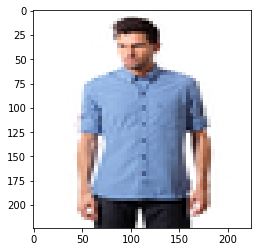

-----------------------------------------------------------------------
most similar products:


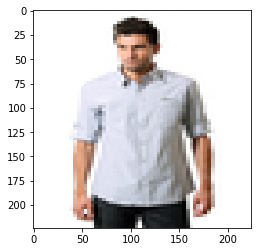

similarity score :  0.87497395


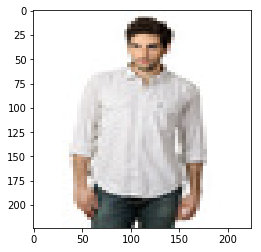

similarity score :  0.8296834


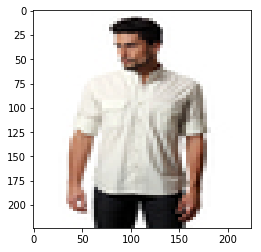

similarity score :  0.82329553


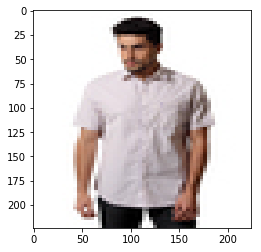

similarity score :  0.82043034


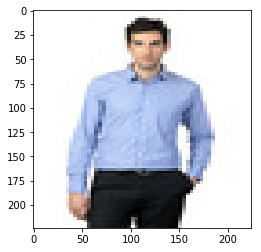

similarity score :  0.8128166


In [56]:
retrieve_most_similar_products(files[171])

In [0]:
df = pd.read_csv('/content/fashion-dataset/styles.csv', error_bad_lines = False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [0]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch
